In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv("../HAM10000_metadata.csv")
metadata.describe(include="all")

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0028440,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [3]:
print(metadata.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [4]:
labels = list(metadata.dx.unique())
print(labels)

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']


nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


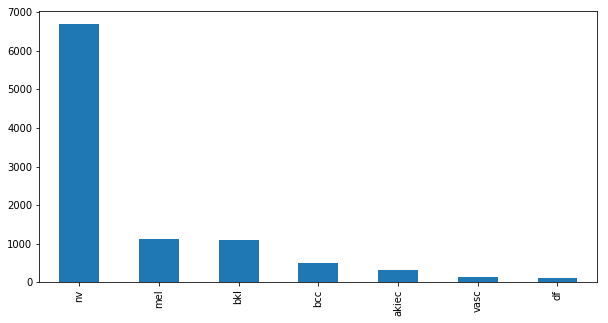

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
counts = metadata["dx"].value_counts()
print(counts)
counts.plot(kind='bar', ax=ax1)
#metadata["dx"].hist()

In [6]:
# parse out all classes to individual dataframes
nv = metadata[metadata["dx"] == "nv"]
nv.name = "nv"
mel = metadata[metadata["dx"] == "mel"]
mel.name = "mel"
bkl = metadata[metadata["dx"] == "bkl"]
bkl.name = "bkl"
bcc = metadata[metadata["dx"] == "bcc"]
bcc.name = "bcc"
akiec = metadata[metadata["dx"] == "akiec"]
akiec.name = "akiec"
vasc = metadata[metadata["dx"] == "vasc"]
vasc.name = "vasc"
df = metadata[metadata["dx"] == "df"]
df.name = "df"
# list out
classes = [nv, mel, bkl, bcc, akiec, vasc, df]

In [7]:
# preprocess accordingly
def preprocess(_image):
    #_image = cv2.cvtColor(_image, cv2.COLOR_BGR2RGB)
    
    #_image = cv2.equalizeHist(_image) 
    #_image = cv2.GaussianBlur(_image, (3,3), 1)
    _image = cv2.cvtColor(_image, cv2.COLOR_RGB2HSV)
    H,S,V = cv2.split(_image)
    _V = cv2.equalizeHist(V) 
    _image = cv2.merge([H, S, _V])
    _image = cv2.cvtColor(_image, cv2.COLOR_HSV2RGB)
    
    return _image

In [8]:
"""
# apply preprocesing and display both side by side for each class
num_images = 2
for _class in classes:
    # plotting
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 15), squeeze=False)
    fig.tight_layout()
    row = _class.sample(n=1)
    _id = row["image_id"].to_string(index=False).strip()
    image = cv2.imread("../ham10000/{}.jpg".format(_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_preprocessed = preprocess(image)
    for l in range(1):
        for m, img in enumerate([image, image_preprocessed]):
            axes[l][m].imshow(img)
            axes[l][m].axis("off")
            axes[l][m].set_title("Mean Pixel Value: {}".format(np.mean(img)))
"""

'\n# apply preprocesing and display both side by side for each class\nnum_images = 2\nfor _class in classes:\n    # plotting\n    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 15), squeeze=False)\n    fig.tight_layout()\n    row = _class.sample(n=1)\n    _id = row["image_id"].to_string(index=False).strip()\n    image = cv2.imread("../ham10000/{}.jpg".format(_id))\n    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n    image_preprocessed = preprocess(image)\n    for l in range(1):\n        for m, img in enumerate([image, image_preprocessed]):\n            axes[l][m].imshow(img)\n            axes[l][m].axis("off")\n            axes[l][m].set_title("Mean Pixel Value: {}".format(np.mean(img)))\n'

## Seperate into Respective Folders

In [182]:
import shutil
from sklearn.model_selection import train_test_split

# seperate images to each directory 
os.mkdir("ham_labled")
os.mkdir("ham_labled/train")
os.mkdir("ham_labled/test")

# each class
for _class in classes:
    _train, _test = train_test_split(_class, test_size = 0.2)
    print("Training: {}, Test: {} images found for class {}".format(len(_train), len(_test), _class.name))
    # train 
    os.mkdir("ham_labled/train/{}".format(_class.name))
    for i, row in _train.iterrows():
        image_id = row["image_id"]
        shutil.move(
            src="../ham10000/{}.jpg".format(image_id), 
            dst="ham_labled/train/{}/".format(_class.name)
        )
    # test
    os.mkdir("ham_labled/test/{}".format(_class.name))
    for i, row in _test.iterrows():
        image_id = row["image_id"]
        shutil.move(
            src="../ham10000/{}.jpg".format(image_id), 
            dst="ham_labled/test/{}/".format(_class.name)
        )
    print("Moving complete for class {}...".format(_class.name))

Training: 5364, Test: 1341 images found for class nv
Moving complete for class nv...
Training: 890, Test: 223 images found for class mel
Moving complete for class mel...
Training: 879, Test: 220 images found for class bkl
Moving complete for class bkl...
Training: 411, Test: 103 images found for class bcc
Moving complete for class bcc...
Training: 261, Test: 66 images found for class akiec
Moving complete for class akiec...
Training: 113, Test: 29 images found for class vasc
Moving complete for class vasc...
Training: 92, Test: 23 images found for class df
Moving complete for class df...


## Image Augumentation

Before we can start passing above images through a CNN feature extractor, we will augument images to address class imbalance problem and set a threshold of 5000 images per class.

In [183]:
from keras.preprocessing.image import ImageDataGenerator

_generator = ImageDataGenerator(
    width_shift_range=0.001,
    height_shift_range=0.001,
    zoom_range=0.01,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.99
)

In [184]:
def load_images(directory):
    images = [cv2.cvtColor(cv2.imread(os.path.join(directory, file)), cv2.COLOR_BGR2RGB)
              for file in os.listdir(directory)]
    return np.array(images)

In [185]:
threshold = 5000
for _class in classes:
    _name = _class.name
    if len(_class) >= threshold:
        continue
    else:
        # what a pain ....PHEW!
        if os.path.exists("ham_labled/train/{}/.ipynb_checkpoints/".format(_name)):
            shutil.rmtree("ham_labled/train/{}/.ipynb_checkpoints/".format(_name))
        print("Augumenting images for class {}...".format(_name))
        X = load_images("ham_labled/train/{}/".format(_name))
        _auguments = _generator.flow(
            x=X,
            y=None,
            batch_size=32,
            save_prefix="augumented",
            save_to_dir="ham_labled/train/{}/".format(_name)
        )
        for _ in range(int(np.ceil((threshold - X.shape[0])/32))):
            x = next(_auguments)

Augumenting images for class mel...
Augumenting images for class bkl...
Augumenting images for class bcc...
Augumenting images for class akiec...
Augumenting images for class vasc...
Augumenting images for class df...


## Read the newly generated Images and process them accordingly

In [9]:
from imutils import paths
import random
from sklearn.preprocessing import LabelEncoder

image_paths = list(paths.list_images("ham_labled/train"))
random.shuffle(image_paths)

labels = [cls.split(os.path.sep)[-2] for cls in image_paths]
le = LabelEncoder()
labels = le.fit_transform(labels)

print("{} total images found...".format(len(image_paths)))


34092 total images found...


## Model

In [13]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [20]:
class CustomNet(object):

    def __init__(self, height, width, channels, classes, parameter_scaling):
        self.height = height
        self.width = width
        self.channels = channels
        self.output_classes = classes
        self.scale = parameter_scaling

    def model(self):
        # initiate model
        _model = Sequential()
        input_shape = (self.height, self.width, self.channels)
        axis = -1
        # if using theano
        if K.image_data_format() == "channels_first":
            input_shape = (self.channels, self.height, self.width)
            axis = 1

        # conv_1
        _model.add(Conv2D(
            self.scale, (3, 3),
            padding="same",
            input_shape=input_shape)
        )
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # conv_2
        _model.add(Conv2D(self.scale, (3, 3), padding="same"))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # pool_1
        _model.add(MaxPooling2D(pool_size=(2, 2)))
        _model.add(Dropout(0.25))

        # conv_3
        _model.add(Conv2D(self.scale*2, (3, 3), padding="same"))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # conv_4
        _model.add(Conv2D(self.scale*2, (3, 3), padding="same"))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # pool_2
        _model.add(MaxPooling2D(pool_size=(2, 2)))
        _model.add(Dropout(0.25))
        
        # conv_5
        _model.add(Conv2D(self.scale*3, (3, 3), padding="same"))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # conv_6
        _model.add(Conv2D(self.scale*3, (3, 3), padding="same"))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization(axis=axis))
        # pool_3
        _model.add(MaxPooling2D(pool_size=(2, 2)))
        _model.add(Dropout(0.25))

        # Fully connected layers
        _model.add(Flatten())
        _model.add(Dense(512))
        _model.add(Activation("relu"))
        _model.add(BatchNormalization())
        _model.add(Dropout(0.5))
        # classifier
        _model.add(Dense(self.output_classes))
        _model.add(Activation("softmax"))

        # return model
        return _model

In [22]:
BATCH_SIZE = 32
LR = 0.001
EPOCHS = 50
PARAMETER_SCALING = 64


def train():
        _model = CustomNet(
            height=256,
            width=256,
            channels=3,
            classes=7,
            parameter_scaling=PARAMETER_SCALING
        ).model()
        _model.compile(
            loss="categorical_crossentropy",
            optimizer=Adam(lr=LR),
            metrics=["accuracy"]
        )
        
        # generators made according to the post
        # https://github.com/keras-team/keras/issues/5862
        data_generator = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.2
        )
        train_generator = data_generator.flow_from_directory(
            directory="ham_labled/train",
            target_size=(256, 256),
            color_mode="rgb",
            class_mode="categorical",
            batch_size=BATCH_SIZE,
            subset="training"
        )
        valid_generator = data_generator.flow_from_directory(
            directory="ham_labled/train",
            target_size=(256, 256),
            color_mode="rgb",
            class_mode="categorical",
            batch_size=BATCH_SIZE,
            subset="validation"
        )
        # train
        history = _model.fit_generator(
            generator=train_generator,
            validation_data=valid_generator,
            validation_steps=6814/BaA
            steps_per_epoch=len(image_paths)//BATCH_SIZE,
            epochs=EPOCHS
        )
        return _model, history

train()

W0806 08:02:26.862293 4544038336 deprecation_wrapper.py:119] From /Users/cn180450/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 08:02:26.864331 4544038336 deprecation_wrapper.py:119] From /Users/cn180450/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 08:02:26.872409 4544038336 deprecation_wrapper.py:119] From /Users/cn180450/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 08:02:26.901921 4544038336 deprecation_wrapper.py:119] From /Users/cn180450/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session in

Found 27278 images belonging to 7 classes.


W0806 08:02:29.676442 4544038336 deprecation.py:323] From /Users/cn180450/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 6814 images belonging to 7 classes.


ValueError: `validation_steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `validation_steps` or use the `keras.utils.Sequence` class.

## Feature Extraction and CNN Setup

The class HDF5IO has the utilities to read/write extracted features from images

In [145]:
import h5py

class HDF5IO:

    def __init__(self, dims, output_path, data_key="images", buf_size=1000):
        if os.path.exists(output_path):
            raise ValueError(
                "The path already exists and cannot be overwritten",
                output_path
            )
        self.db = h5py.File(output_path, "w")
        self.data = self.db.create_dataset(
            data_key,
            dims,
            dtype="float"
        )
        self.labels = self.db.create_dataset(
            "labels",
            (dims[0],),
            dtype="int"
        )
        self.buf_size = buf_size
        self.buffer = {"data": [], "labels": []}
        self.idx = 0

    def add(self, rows, labels):
        """
        Adds the rows and labels to the buffer
        :param rows:
        :param labels:
        :return:
        """
        self.buffer["data"].extend(rows)
        self.buffer["labels"].extend(labels)
        # check to see if the buffer needs to be flushed to disk
        if len(self.buffer["data"]) >= self.buf_size:
            self.flush()

    def flush(self):
        """
        Write the buffers to disk then reset the buffer
        :return:
        """
        i = self.idx + len(self.buffer["data"])
        self.data[self.idx:i] = self.buffer["data"]
        self.labels[self.idx:i] = self.buffer["labels"]
        self.idx = i
        self.buffer = {"data": [], "labels": []}

    def store_class_labels(self, class_labels):
        """
        create a dataset to store the actual class label names,
        then store the class labels
        :return:
        """
        dt = h5py.special_dtype(vlen=str)
        label_set = self.db.create_dataset(
            "label_names",
            (len(class_labels),),
            dtype=dt
        )
        label_set[:] = class_labels

    def close(self):
        """
        Closes the dataset
        :return:
        """
        if len(self.buffer["data"]) > 0:
            self.flush()
        # close the dataset
        self.db.close()


In [147]:
from keras.applications import VGG16
from keras.applications import imagenet_utils

# load the VGG16 model with imagenet weights
model = VGG16(weights="imagenet", include_top=False)

In [158]:
dataset = HDF5IO(
    (len(image_paths), 512 * 7 * 7),
    os.path.join(os.getcwd(), "hmnist_features"),
    data_key="features",
    buf_size=1000
)
dataset.store_class_labels(le.classes_)

In [159]:
import progressbar

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

# initialize the progress bar
widgets = [
    "Extracting Features: ", progressbar.Percentage(), " ",
    progressbar.Bar(), " ", progressbar.ETA()
]
pbar = progressbar.ProgressBar(
    maxval=len(image_paths),
    widgets=widgets
).start()

bs = 32

# loop over the images in patches
for i in np.arange(0, len(image_paths), bs):
    # extract the batch of images and labels, then initialize the
    # list of actual images that will be passed through the network
    # for feature extraction
    batch_paths = image_paths[i:i + bs]
    batch_labels = labels[i:i + bs]
    batch_images = []

    # loop over the images and labels in the current batch
    for (j, image_path) in enumerate(batch_paths):
        
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)

        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)

        # add the image to the batch
        batch_images.append(image)

    batch_images = np.vstack(batch_images)
    features = model.predict(batch_images, batch_size=bs)

    features = features.reshape((features.shape[0], 512 * 7 * 7))

    # add the features and labels to our HDF5 dataset
    dataset.add(features, batch_labels)
    pbar.update(i)

# close the dataset
dataset.close()
pbar.finish()


Extracting Features: 100% |#####################################| Time: 0:57:51


## Reading features from disk and applying a model

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle

In [165]:
# get the features from disk
db = h5py.File("hmnist_features", "r")

# trian test split
i = int(db["labels"].shape[0] * 0.80)

In [ ]:
model = LogisticRegression(
    solver="lbfgs", 
    multi_class="auto",
    n_jobs=-1,
    C=10.0,
    verbose=10.0
)
model.fit(db["features"][:i], db["labels"][:i])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 15.8min finished


In [168]:
# evaluate the model
print("[INFO] evaluating...")
preds = model.predict(db["features"][i:])
print(
    classification_report(
        db["labels"][i:], 
        preds,
        target_names=db["label_names"]
    )
)

[INFO] evaluating...
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00         0
         bcc       0.87      0.92      0.89      2044
         bkl       0.00      0.00      0.00         0
          df       0.00      0.00      0.00         0
         mel       0.00      0.00      0.00      5027
          nv       0.00      0.00      0.00         0
        vasc       0.00      0.00      0.00         0

   micro avg       0.27      0.27      0.27      7071
   macro avg       0.12      0.13      0.13      7071
weighted avg       0.25      0.27      0.26      7071



/Users/cn180450/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cn180450/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
